# Final Project:  Spam filter

## Task

You’re the project manager for an enterprise email system and assigned a task to develop a spam filter for a company's email system. We’ve collected email samples that have been validated to be spam or non-spam emails. Your task is to predicts whether an email contains spam or not.

You are given 3068 training emails with two classes: "spam" or "not spam". Using these data, you are expected to build your own spam filter with the kownledge you learned from this course. The goal is to correctly classify 1292 test emails. 




### Example
- **Spam email**

> Subject: younger and healthier with ultimate - hghl 7283  as seen on nbc , cbs , cnn , and even oprah ! the health discovery that actuallyreverses aging while burning fat , without dieting or exercise ! this provendiscovery has even been reported on by the new england journal of medicine . forget aging and dieting forever ! and it ' s guaranteed !  click below to enter our web site :  http : / / www . freehostchina . com / washgh /  would you like to lose weight while you sleep !  no dieting !  no hunger pains !  no cravings !  no strenuous exercise !  change your life forever !  100 % guaranteed !  1 . body fat loss 82 % improvement .  2 . wrinkle reduction 61 % improvement .  3 . energy level 84 % improvement .  4 . muscle strength 88 % improvement .  5 . sexual potency 75 % improvement .  6 . emotional stability 67 % improvement .  7 . memory 62 % improvement .  click below to enter our web site :  http : / / www . freehostchina . com / washgh /  if you want to get removed  from our list please email at - standardoptout @ x 263 . net ( subject = remove " your email " )

- **Not-spam email**

> Subject: december 6 th meeting  dear mr . kaminski :  this is to confirm the december 6 th meeting here at our center .  the location for the meeting is room # 3212 steinberg hall - dietrich hall and  the time will run from 9 : 00 am - 11 : 00 am .  please let us know if you need anything further .  we look forward to seeing you then .  regards ,  theresa convery  ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~  theresa convery  administrative assistant  risk and decision processes center  the wharton school of the university of pennsylvania  ( 215 ) 898 - 5688 / fax : ( 215 ) 573 - 2130  tconvery @ wharton . upenn . edu

## Outline of solution


**1. Text representation.**

As you can see, text content of emails is unstructured data. To apply machine learning methods on top of them, we first need to extract structured feature. To demonstrate this, we'll show using bag-of-word model for textural represention.

** 2. Build your classifier. **

As baseline, we provide solution based on *SVM* (Support Vector Machine).

** 3. Evaluation **

We will use *AP* (Average Precision) and *Accuracy* for performance evaluation in this notebook.

Note that for evaluation on kaggle competition, [*MCE*](https://www.kaggle.com/wiki/MeanConsequentialError) (Mean Consequential Error) is used instead.


## Python package dependence
- **pandas**   : for loading CSV files;
- **nltk**     ：for word pre-processing;
- **wordcloud**: for data visulization.

Tips: To install missing packages, you can either do "pip install package_name" or "conda install package_name" in case of anaconda.

# Data preparation

## 1) Download data.

Download "emails.train.csv", "emails.test.csv" from our kaggle competition page [here](https://www.kaggle.com/c/spamfilter-aml-uva/data), and put it under the same folder as this ipython notebook.



## 2) Read in data.

In [8]:
import os, sys
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import operator

assert os.path.exists('./emails.train.csv'), "[Dataset File Not Found] Please download dataset first."

In [9]:
# Read in csv file as dataframe
df = pd.read_csv('./emails.train.csv')
zf = pd.read_csv('./emails.test.csv')
# Show a snippet of dataset.
print df.head()
print np.sum(zf['spam'])
spamappend = 0
hamappend = 0
for i in df["spam"]:
    if i == 1:
        spamappend += 1
    if i == 0:
        hamappend +=1

probspam = float(spamappend)/(spamappend+hamappend)
print probspam
spam = sum(df["spam"])
ham =  len(df["spam"])-sum(df["spam"])
probspam = float(spam)/(spam+ham)
print probspam

   id                                               text  spam
0   0  Subject: naturally irresistible your corporate...     1
1   2  Subject: unbelievable new homes made easy  im ...     1
2   3  Subject: 4 color printing special  request add...     1
3   4  Subject: do not have money , get software cds ...     1
4   5  Subject: great nnews  hello , welcome to medzo...     1
415
0.23700571997
0.23700571997


As you can see above, each emails has two fields: 
* "text": the full text content of an email.
* "spam": an integer flag to mark whether an email is a spam (=1) or not (=0).

In [10]:
print("===========================")
print("Example of spam emails")
print("---------------------------")

df_pos = df[df['spam']==1]

print( np.random.choice(df_pos['text']) ) 

print("===========================")

Example of spam emails
---------------------------
Subject: looking for good it team ? we do software engineering !  looklng for a good lt team ?  there can be many reasons for hiring a professional  lt team . . .  - lf you ' ve qot an active on - line business and you  are dissatisfied with the guaiity of your currentsupport , its cost , or  both . . .  - lf your business is expanding and you ' re ionqing  for a professionai support team . . .  - lf you have specific software requirements and  you ' d iike to have your soiutions customized , toqetherwith warranties and  reiiabie support . . .  - if you have the perfect business idea and want to  make it a reality . . .  - if your project has stalled due to lack of  additional resources . . .  - if you need an independent team for benchmarking ,  optimization , quality assurance . . .  if you ' re looking for  a truly professional team , we are at your service ! just visit our  website  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

In [11]:
print("===========================")
print("Example of not spam emails")
print("---------------------------")

df_neg = df[df['spam']==0]

print( np.random.choice(df_neg['text']) ) 

print("===========================")

Example of not spam emails
---------------------------
Subject: australian energy risk 2000  as australian energy risk 2000 is approaching . i am emailing you with  regards to your presentation . the deadline date is monday 12 june . if this  is going to be a problem please let me know i will be out of the office from  monday 12 , until monday 19 june , on which date i will be putting the  presentation pack together to send to the printers . if your presentation is  complete could you please email it to ldeathridge @ risk . co . uk as a  powerpoint file asap .  if you have any problems in doing this please do not hesitate to contact me  by email or on ( 020 ) 7484 9867 . i will reply to any queries when i return .  regards  lucie deathridge  conference co - ordinator  risk publications  ?  tel : ( + 44 ) ( 020 ) 7484 9867  http : / / www . riskpublications . com


# Text representation

## 1) Create the bags of words vocabulary. 

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. The bag-of-words model has also been used for computer vision. (from [wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model))


In [12]:
# DIT ITEREERT DUS OVER DE PANDAS DATAFRAME
def select_vocabulary(dataframe, topN=10000):
    # for w in dataframe.str.lower():
    word2freq = dict()
    for line in dataframe:
        words = line.split()
#       met setdefault fixed ie de value in de dict op 0 tenzij er iets te tellen valt dan +1
        for word in words:
            word2freq[word] = word2freq.setdefault(word, 0) +1

    word_freq = [ (word,freq) for word,freq in word2freq.items() ]
    
    # sort according to freq, in descending order.
    word_freq.sort(key=lambda x:x[1], reverse=True) 
    
    # show selection results
    print("%-10s  %10s" % ('word', 'frequency'))
    print("-------------------------")
    for i in range(15):
        print("%-10s  %10d" % (word_freq[i]))
    print("...\n")
    
#     returned top 100 meest voorkomende woorden
    return([x[0] for x in word_freq[:topN]])

vocabulary = select_vocabulary(df['text'])
word2ind   = dict(zip(vocabulary, range(len(vocabulary))))
# dus als je print vocabulary[0] krijg je - en als je doet word2ind['-'] krijg je 0 gezien die het vaakst voorkomt
print word2ind['enron']
print vocabulary[0]

word         frequency
-------------------------
-                72932
.                65233
,                42792
the              34362
:                29814
to               28822
/                27959
and              19173
of               16317
>                14658
a                13894
you              13305
in               12631
i                12151
for              11639
...

17
-


## 2) Extract Bag-of-Word Feature

In [ ]:
print vocabulary

In [14]:
def extract_Bag_of_Word_feature(dataframe):
    BoWs = np.zeros((len(dataframe), len(vocabulary)), dtype=np.float32)

    for i, line in enumerate(dataframe):
        for word in line.split():
            word_ind = word2ind.get(word, -1)
            if(word_ind>=0):
                BoWs[i, word_ind] += 1

        if i%1000==0:
            print("%4d / %d " % (i, len(dataframe)))
    print("%4d / %d " % (i, len(dataframe)))
            
    return BoWs


# Make sure use cleaned version
train = pd.read_csv('./emails.train.csv')
test  = pd.read_csv('./emails.test.csv')

# Get labels
Y_train = train['spam']
Y_test  = test['spam']

print("Extracting feature for train ...")
X_train = extract_Bag_of_Word_feature(train['text'])

print("Extracting feature for test ...")
X_test  = extract_Bag_of_Word_feature(test[ 'text'])

print('Finish.')

 Extracting feature for train ...
   0 / 4021 
1000 / 4021 
2000 / 4021 
3000 / 4021 
4000 / 4021 
4020 / 4021 
Extracting feature for test ...
   0 / 1707 
1000 / 1707 
1706 / 1707 
Finish.


# Baseline solution

In [ ]:
from sklearn.metrics import average_precision_score, accuracy_score
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, Y_train)

def eval(model, X_test, Y_test, method=''):
    print("====== Performance of: {method} =======".format(method=method))
    
    # Predict decision labels.
    Y_pred  = model.predict(X_test)  
    print("Metric[{metric:20s}]  {score:-3f}".format( metric="Accuracy", 
                                              score=accuracy_score(Y_test, Y_pred)) )

    # Predict confidence scores.
    Y_score = model.decision_function(X_test)    
    print("Metric[{metric:20s}]  {score:-3f}".format( metric="Average Precision", 
                                              score=average_precision_score(Y_test, Y_score)) )

    # write to submit format
    outf = 'kaggle_data/solution.%s.csv'% method
    with open( outf, 'w') as f:
        f.write('id,spam\n')
        for i in range(len(Y_pred)):
            # print test['id'][0]
            f.write('%s,%s\n' % (test['id'][i], Y_pred[i]) )
    print("[output] "+outf)
    
    
# evaluate current model
eval(model, X_test, Y_test, method='SVM')

Notice that the positive and negative examples in test is not balance (with Nr(pos)=1707, Nr(neg)=415 )

In [ ]:

# Predict all labels as negative (=0)
print("====== Predict as all negative =======")
Y_pred_all_neg  = np.zeros((len(Y_test),), dtype=np.int)
print("Metric[{metric:20s}]  {score:-3f}".format( metric="Accuracy", 
                                          score=accuracy_score(Y_test, Y_pred_all_neg)) )

# Random guess performance
print("====== Predict by random guess =======")
Y_score_rand = np.random.uniform(0,1, (len(Y_test),))    # Generate prediction score by random
print("Metric[{metric:20s}]  {score:-3f}".format( metric="Average Precision", 
                                              score=average_precision_score(Y_test, Y_score_rand)) )




# Advanced: Data Preprocess

However, obtaining good textural representation can be tricky as you may notice that the content of emails are noisy.
We'll provide example code for text cleaning and you are expected to come up with smarter way to do it.

## Text cleaning

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Om dit te runnen heb je de wordcloud module nodig.. als je op linux zit gewoon pip install wordcloud
from wordcloud import WordCloud

def wordcloud(dataframe, title=None):
    wordcloud = WordCloud(background_color="black").generate(" ".join([i for i in dataframe.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    if title is not None:
        plt.title(title)

# show the word cloud of orignial dataset.
wordcloud(df['text'], 'orignial dataset')

- ### **Stop words** 
 Stop Words are words which do not contain important significance to be used in Search Queries. For example, 'a', 'the', 'is', 'as', etc. Usually these words need to be filtered out because they return vast amount of unnecessary information. 

- ### **Stemming**
 In linguistic morphology and information retrieval, stemming is the process for reducing inflected (or sometimes derived) words to their stem, base or root form—generally a written word form. The stem need not be identical to the morphological root of the word; it is usually sufficient that related words map to the same stem, even if this stem is not in itself a valid root. Algorithms for stemming have been studied in computer science since the 1960s. Many search engines treat words with the same stem as synonyms as a kind of query expansion, a process called conflation.

 Stemming programs are commonly referred to as stemming algorithms or stemmers.

- ### **Lemmatization**
 Lemmatisation (or lemmatization) in linguistics, is the process of grouping together the different inflected forms of a word so they can be analysed as a single item.

 In computational linguistics, lemmatisation is the algorithmic process of determining the lemma for a given word. Since the process may involve complex tasks such as understanding context and determining the part of speech of a word in a sentence (requiring, for example, knowledge of the grammar of a language) it can be a hard task to implement a lemmatiser for a new language.

 In many languages, words appear in several inflected forms. For example, in English, the verb ‘to walk’ may appear as ‘walk’, ‘walked’, ‘walks’, ‘walking’. The base form, ‘walk’, that one might look up in a dictionary, is called the lemma for the word. The combination of the base form with the part of speech is often called the lexeme of the word.

 Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

We’ll use python package *nltk* to do this. But before any operation, we need to download necessary nltk corpuses first with its interface.

In [ ]:
# Download nltk corpus
import nltk

In [ ]:
nltk.download()

| Instal Wordnet corpus                | Instal Stopwords corpus                |
| ------------------------------------ |:--------------------------------------:|
| ![alt text](images/nltk_wordnet.png) | ![alt text](images/nltk_stopwords.png) |




In [ ]:
def text_regularize(dataframe, method='lemm'):
    print('Performing: %s ...' % method)
    def stemming(worker, tag):
        return worker.stem(tag)

    def lemmatize(worker, tag):
        return worker.lemmatize(tag)

    if   method=='stem':
        worker = nltk.PorterStemmer()
        func = stemming
    elif method=='lemm':
        worker = nltk.WordNetLemmatizer()
        func = lemmatize
    else:
        raise NotImplementedError

    for i, line in enumerate(dataframe['text']):
#         haalt de woorden uit de dataframe
        elems = line.strip().split()
    
        # apply stemming or lemmatize
        newtags = [func(worker,tag.lower()) for tag in elems]
        newline = " ".join(newtags)

        # update text
        dataframe.loc[i,'text'] = newline

    # return dataframe

def text_filtering(dataframe, extras=set()):
    print('Performing: filtering ...')
    import re
    
    from nltk.corpus import stopwords
    filter_set = set(stopwords.words('english'))
    filter_set.update(extras)

    for i, line in enumerate(dataframe['text']):
        # remove special characters with regex
        line = re.sub(r'[^\w]', ' ', line)

        # remove digits with regex
        line = re.sub("(^|\W)\d+($|\W)", " ", line)

        # remove stop words
        elems = line.strip().split()
        newtags = filter(lambda x: x not in filter_set, elems)
        newline = " ".join(newtags)

        # update text
        dataframe.loc[i, 'text'] = newline
    # return dataframe
    

print('========= Clearn tranining data ==========')
# Read in training data
df = pd.read_csv('./emails.train.csv')

# Do cleaning
text_regularize(df, 'lemm')
text_regularize(df, 'stem')
text_filtering(df, extras=set(['subject', 'ect', 'hou', '_']))

# Save as new file
df.to_csv('emails_clean.train.csv')


print('========= Clearn testing data ==========')
# Read in testing data
df = pd.read_csv('./emails.test.csv')

# Do cleaning
text_regularize(df, 'lemm')
text_regularize(df, 'stem')
text_filtering(df, extras=set(['subject', 'ect', 'hou', '_']))

# Save as new file
df.to_csv('emails_clean.test.csv')

print('finish')

In [ ]:
# Now show the word cloud after cleaning.
wordcloud(df['text'], 'After text cleaning')

# Based on the observation from this word cloud, you may add more non-meaningful words into `extras'. 

In [ ]:
##########################################
#HIER BEGINT DE ECHTE CODE
#############################################

In [1]:
import os, sys
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import operator
import matplotlib.pyplot as plt
%matplotlib inline

assert os.path.exists('./emails.train.csv'), "[Dataset File Not Found] Please download dataset first."

In [2]:

# get word frequency data for both train data
def word_frequency_train(dataframe):
    # for w in dataframe.str.lower():
#     create a dataframe of all words
    
    datasetwords = {}
    
    for line in dataframe["text"]:
        words = line.split()
        for word in words:
            if word in datasetwords:
                datasetwords[word] += 1
            else:
                datasetwords[word] = 1
    
    return datasetwords

# get word frequency data for mails
def word_frequency_mail(mail):
    words = mail.split()
    datasetwords = {}
    for word in words:
        if word in datasetwords:
            datasetwords[word] += 1
        else:
            datasetwords[word] = 1
    
    return datasetwords

    

In [3]:
# freqsword = frequency word in spam, freqhword is frequency word in ham
def NaiveBayesian(probspam,freqsword,freqhword,totalfreqs,totalfreqh):
    
#   probability of a mail being ham 
    probham = 1-probspam
    
#   calculate probability of word being in spam or word being in spam
    probwordspam = float(freqsword)/(totalfreqs)
    probwordham = float(freqhword)/(totalfreqh)
    bayes = (float(probwordspam*probspam)/(probwordspam*probspam + probwordham*probham))


#       equation for correcting the probability where s =3 means that meaning that the learned dictionary
#       must contain more than 3 messages with the word
    s = 3
    correctedbayes = float(s*probspam+freqsword*bayes)/(s+freqsword)
    
#   if the spamicity of the word is around 0.5 return none since the probability of the word being ham or spam
#   is too similar so we evaluate only spammicities of <=0.2 and >= 0.8
    
    if correctedbayes >= 0.8 or bayes <=0.2:
        return correctedbayes

    else:
        return None

    
    


In [4]:

# Here we call our Naive Bayesian performer with the data we read in from train and test and check
# if the test mail is spam or not
def CallBae(freqspam,freqham,mail,probspam,totalfreqs,totalfreqh):
    spamchecklist = []
    
    for word in mail:
    
#     if word in spam and ham check its frequency and perform the Bayesian as many times as needed
        if word in freqspam and word in freqham:
            for i in range(mail[word]):
                freqsword = freqspam[word]
                freqhword = freqham[word]
                spamchecklist.append(NaiveBayesian(probspam,freqsword,freqhword,totalfreqs,totalfreqh))

    #   if the word is in neither spam or ham we continue the word iteration
        elif word not in freqspam and word not in freqham:
            continue

    #  we initialize freqsword as a tiny number here cause else the Bayesian would not be able to pick up that 
    #  the word is in ham if the word never appears in spam but does appear in ham
        elif word in freqham and word not in freqspam:
            for i in range(mail[word]):
                freqsword = 10**(-8)
                freqhword = freqham[word]
                spamchecklist.append(NaiveBayesian(probspam,freqsword,freqhword,totalfreqs,totalfreqh))

            
#   Clean up the spamchecklist
    spamchecklist = np.array(spamchecklist)
    spamchecklist = spamchecklist[spamchecklist != np.array(None)]
    
################################################################
#    Again zou eigenlijk correct meoten zijn maar werkt niet (dit selecteert van de data alleen de 10 beste entries)
#     try:
#         spamchecklist = np.take(spamchecklist,(np.argpartition(abs(0.5-spamchecklist), -10)[-10:]))
#     except:
#         spamchecklist = spamchecklist
#  #####################################################################   

    
#   Count all probabilities in spamchecklist and calculate the overal probability of the mail being spam or ham
    multiplicationsum = np.prod(spamchecklist)
    ones = np.ones(spamchecklist.shape)
    pminusonesum = np.prod(ones-spamchecklist)
    
#   Make sure we won't have conflicts with machine precision for if the mail is almost certainly spam we get very
#   small numbers which add to 0 under machine precision
    if pminusonesum + multiplicationsum ==0:
        finaljudge = 1
    else:   
        finaljudge = multiplicationsum/(multiplicationsum+pminusonesum)
        
#########################################
# DIT WERKT SOMEHOW BETER maar theoretisch onjuist dus niet super handig te gebruiken (voor de overal probability te berekenen)
#     finaljudge = sum(spamchecklist/len(spamchecklist))
###############################################
    
#   Return False if spam
    if finaljudge > 0.5:
        return True
#   Return True if ham
    if finaljudge < 0.5:
        return False

In [80]:
# Takes as input frequency table of spam words, frequency table of ham words,the mail we have to check,
# probability mail is spam, total frequency of words in spam and total frequency of words  in  ham
def Classifier(freqspam,freqham,test,probspam,totalfreqs,totalfreqh,train):
    iddict = {}
    spamdict = {}
    idlist = []
    spamlist = [] 
    
# loop through all the mails in the test and perform naive bayesian and add id number to the list
    for i in test['id']:
        idlist.append(i)
        mail = test.loc[test['id'] == i, 'text'].iloc[0]        
        mail = word_frequency_mail(mail)
    
#         if we get True from CallBae mail is spam and we add it to the spam dictionary
        if CallBae(freqspam,freqham,mail,probspam,totalfreqs,totalfreqh):
            spamlist.append(1)

            freqspam = combine_dicts(freqspam,mail)
            totalfreqs = sum(freqspam.values())      
    
#             If we get False from Callbae mail is added to ham dictionary and defined as ham
        else:
            spamlist.append(0)
            freqham = combine_dicts(freqham,mail)
            totalfreqh = sum(freqham.values())
                   
    
#   create our submission with per id the indicator whether the mail is spam or not (1 or 0)
    spamdict['spam'] = spamlist
    iddict['id'] = idlist
    spamdict = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in spamdict.items()]))
    iddict = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in iddict.items()]))
    submission = pd.concat([iddict,spamdict],axis = 1)
    submission.set_index('id',inplace=True)
    submission.to_csv('submission.csv')
    return submission,idlist



In [6]:
# function for combining dictionaries
def combine_dicts(a, b, op=operator.add):
    return dict(a.items() + b.items() +[(k, op(a[k], b[k])) for k in set(b) & set(a)])

In [15]:
# intialize initials
train = pd.read_csv('./emails_clean.train.csv')
test  = pd.read_csv('./emails_clean.test.csv')
hamdata = train[train.spam == 0]
spamdata = train[train.spam == 1]
freqham = word_frequency_train(hamdata)
freqspam = word_frequency_train(spamdata)
totalfreqs = sum(freqspam.values())
totalfreqh = sum(freqham.values())


# Call our  model
submission,idlist = Classifier(freqspam,freqham,test,probspam,totalfreqs,totalfreqh,train)

MCE = []
# MEAN CONSEQUENTIAL EVALUATER:
for j in np.arange(0.4,0.6,0.9):
    probspam = j
    submission,idlist = Classifier(freqspam,freqham,test,probspam,totalfreqs,totalfreqh,train)
    ms = 0
    
    for i in idlist:
        try:      
            if test.loc[test['id'] == i, 'spam'].iloc[0] != submission["spam"][i]:
                ms +=1
        except:
            continue

    MCE.append(1./submission.shape[0]*ms)



print MCE

[0.23842999414176919, 0.23081429408318688, 0.20855301698886936, 0.1622729935559461, 0.12478031634446397, 0.08670181605155243, 0.0421792618629174, 0.025190392501464556, 0.026947861745752782, 0.056824838898652606, 0.13884007029876977, 0.3380199179847686, 0.6906854130052724, 0.7486818980667839, 0.7568834212067955, 0.7568834212067955, 0.7574692442882249, 0.7574692442882249]


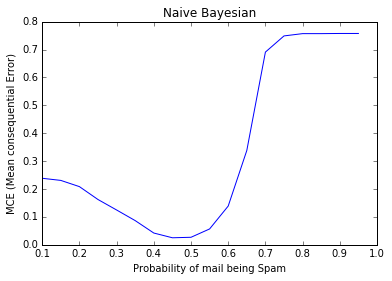

In [17]:
x = np.arange(0.1,1,0.05)
plt.plot(x,MCE)
plt.title("Naive Bayesian")
plt.ylabel("MCE (Mean consequential Error)")
plt.xlabel("Probability of mail being Spam")
plt.show()


In [118]:
# d1 = dict(d.items()[len(d)/2:])
# d2 = dict(d.items()[:len(d)/2])
train = pd.read_csv('./emails_clean.train.csv')
n_objects = train.text.shape[0]
train_test_split = 0.7
train_size = int(n_objects * train_test_split)
indices = np.arange(n_objects)
np.random.seed(1)
np.random.shuffle(indices)
train_indices, test_indices = indices[:train_size], indices[train_size:]
train_set= train.iloc[train_indices]
test_set= train.iloc[test_indices]


In [119]:
hamdata = train_set[train_set.spam == 0]
spamdata = train_set[train_set.spam == 1]
freqham = word_frequency_train(hamdata)
freqspam = word_frequency_train(spamdata)
totalfreqs = sum(freqspam.values())
totalfreqh = sum(freqham.values())



In [120]:
# MEAN CONSEQUENTIAL EVALUATER:
MCE = 0.4
probspam = 0.5
while MCE >0.028:
    submission,idlist = Classifier(freqspam,freqham,test_set,probspam,totalfreqs,totalfreqh,train)
    ms = 0
    for i in range(20):
        freqspam.pop( np.random.choice(freqspam.keys()) ) 
        freqham.pop( np.random.choice(freqham.keys()) ) 

    for i in idlist:
        try:      
            if test_set.loc[test_set['id'] == i, 'spam'].iloc[0] != submission["spam"][i]:
                ms +=1
        except:
            continue

    MCE=1./submission.shape[0]*ms



    print MCE

0.0306545153273
0.029826014913
0.0289975144988
0.029826014913
0.029826014913
0.0439105219553
0.0439105219553
0.029826014913
0.029826014913
0.0273405136703


In [132]:
test  = pd.read_csv('./emails_clean.test.csv')
train = pd.read_csv('./emails_clean.train.csv')
test  = pd.read_csv('./emails_clean.test.csv')
hamdata = train[train.spam == 0]
spamdata = train[train.spam == 1]
freqham = word_frequency_train(hamdata)
freqspam = word_frequency_train(spamdata)
totalfreqs = sum(freqspam.values())
totalfreqh = sum(freqham.values())
probspam = 0.5




submission,idlist = Classifier(freqspam,freqham,test,probspam,totalfreqs,totalfreqh,train)
ms = 0
 
MCE = []
for i in idlist:
    try:      
        if test.loc[test['id'] == i, 'spam'].iloc[0] != submission["spam"][i]:
            ms +=1
    except:
        continue

MCE.append(1./submission.shape[0]*ms)
MCE.append(1./submission.shape[0]*ms)
print MCE
while np.array(MCE)[-2] - np.array(MCE)[-1] ==0 and np.array(MCE)[-2] - np.array(MCE)[-1]<0.01:
    submission,idlist = Classifier(freqspam,freqham,test,probspam,totalfreqs,totalfreqh,train)
    ms = 0
    for i in range(20):
        freqspam.pop( np.random.choice(freqspam.keys()) ) 
        freqham.pop( np.random.choice(freqham.keys()) ) 

    for i in idlist:
        try:      
            if test.loc[test['id'] == i, 'spam'].iloc[0] != submission["spam"][i]:
                ms +=1
        except:
            continue

    MCE.append(1./submission.shape[0]*ms)
    print MCE

[0.022261277094317515, 0.022261277094317515]
[0.022261277094317515, 0.022261277094317515, 0.022261277094317515]
[0.022261277094317515, 0.022261277094317515, 0.022261277094317515, 0.020503807850029292]
